# Mushroom classification using LR 

In [1]:
import numpy as np
import pandas as pd


In [2]:
iData = pd.read_csv('mushrooms.csv')
iData.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
iData.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
iData.shape

(8124, 23)

In [5]:
iData.dtypes


class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [6]:
iData.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
iData.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
iData["class"].unique()

array(['p', 'e'], dtype=object)

In [11]:
X = iData.drop('class', inplace=False, axis=1)
print(X.columns)
print("*"*100)
y = iData['class']
print(y.shape)
print(X.shape)

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')
****************************************************************************************************
(8124,)
(8124, 22)


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.columns:
  X[col] = le.fit_transform(X[col])
y = le.fit_transform(y)

print(X.head())
print(y)


   cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          1           4            0  ...   
1             0          0           4            0  ...   
2             0          0           5            0  ...   
3             0          1           5            0  ...   
4             1          0           4            1  ...   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         2                       7                       7   
1                         2                     

In [13]:
unique_ele, unique_count = np.unique(y,return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_ele, unique_count)))

Frequency of unique values of the said array:
[[   0    1]
 [4208 3916]]


In [14]:
from sklearn.model_selection import train_test_split

X_1, X_test, y_1, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_1,y_1,test_size= 0.2, random_state=42)

print("X_train shape: ",X_train.shape, "y_train shape: ",y_train.shape)
print("X_cv shape: ",X_cv.shape, "y_cv shape: ",y_cv.shape)
print("X_test shape: ",X_test.shape, "y_test shape: ",y_test.shape)

X_train shape:  (5199, 22) y_train shape:  (5199,)
X_cv shape:  (1300, 22) y_cv shape:  (1300,)
X_test shape:  (1625, 22) y_test shape:  (1625,)


In [15]:
#perform scaling before applying logistic regression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_trainS = sc.fit_transform(X_train)
X_1S = sc.fit_transform(X_1)
X_cvS = sc.transform(X_cv)

X_testS = sc.transform(X_test)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
alpha = [10**x for x in range(-4,4,1)]
acc = []
for c in alpha:
  clf = LogisticRegression(penalty='l2',tol=0.0001, C=c,max_iter=1000)
  clf.fit(X_trainS,y_train)
  y_pred = clf.predict(X_cvS)
  score = accuracy_score(y_pred,y_cv)
  acc.append(score)
  print(score)

C:\Users\Lenovo\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8815384615384615
0.9015384615384615
0.9323076923076923
0.9476923076923077
0.9515384615384616
0.9615384615384616


C:\Users\Lenovo\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed

0.9646153846153847
0.9653846153846154


C:\Users\Lenovo\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


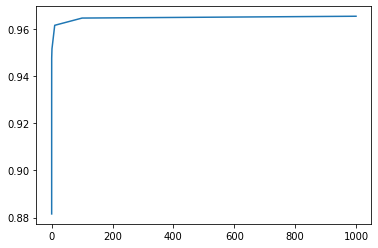

In [18]:
import matplotlib.pyplot as plt
plt.plot(alpha,acc)

In [20]:
#final accuracy 
clf = LogisticRegression(penalty='l2',tol=0.0001, C=c,max_iter=1000)
clf.fit(X_trainS,y_train)
y_pred = clf.predict(X_testS)
score = accuracy_score(y_pred,y_test)
print(score)

0.9649230769230769


C:\Users\Lenovo\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
#confusion matrix performed
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[808,  22],
       [ 35, 760]], dtype=int64)

In [22]:
#feature importance of this dataset
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       830
           1       0.97      0.96      0.96       795

    accuracy                           0.96      1625
   macro avg       0.97      0.96      0.96      1625
weighted avg       0.97      0.96      0.96      1625



In [23]:
clf.coef_

array([[ 0.0125871 ,  0.38674885, -0.33569315,  0.90999719, -2.76114797,
        -2.0628624 , -8.16905007,  9.58140561, -0.77644999, -0.72096474,
        -8.72342326, -7.88746704,  0.36310591, -0.44730916, -0.25140761,
         0.        , 11.59067245,  0.55102279,  8.46084648, -0.24400523,
        -1.49940324,  0.28536971]])